# Analyse Results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

sns.set()
plt.style.use('ggplot')
fontdict = {'fontsize': 15}

## Load Data

In [2]:
words = ['arles', 'arose', 'dares', 'lares', 'lores', 'nares',
        'raile', 'raise', 'rales', 'rates', 'reais', 'roate',
        'soare', 'stare', 'tales', 'tares', 'tores']

algos = ['lf', 'gyx', 'lf-pop', 'gyx-pop']

In [3]:
df = pd.DataFrame()
all_data = pd.DataFrame()

for algo in algos:
    print(f'Loading {algo}...')
    for word in words:
        download_path = f'../kernel_output/{algo}/'
        if algo == 'gyx':
            algo_correct = 'expected_gyx'
        elif algo == 'lf-pop':
            algo_correct = 'lf'
        elif algo == 'gyx-pop':
            algo_correct = 'expected_gyx'
        else:
            algo_correct = algo
        filename = f"wordlebot-{algo_correct}-{word}.csv"
        
        if filename in os.listdir(download_path):
            temp_df = pd.read_csv(f'{download_path}{filename}')
            temp_df['algo'] = algo
            all_data = all_data.append(temp_df)
            with open(f"{download_path}wordlebot-{algo}-{word}.log") as f:
                temp_log = f.readlines()
            runtime = pd.DataFrame(eval(''.join(temp_log))).time.iloc[-1]
            temp_results = pd.DataFrame([{
                'Seed Word': word,
                'Ranking Algorithm': algo,
                # 'Runtime': runtime,
                'Mean Steps': temp_df.steps.mean(),
                'Success Rate': temp_df.steps.le(6).mean(),
                '3-Steps or Less': temp_df.steps.le(3).mean(),
                'Worst Case': temp_df.steps.max()
            }])
            
            df = df.append(temp_results)

print('Loading ncands...')
for word in words:
    data_path = '../results'
    filename = f'wordlebot_{word}.csv'
    if filename in os.listdir(data_path):
        temp_df = pd.read_csv(f'{data_path}/{filename}')
        temp_df['algo'] = 'ncands'
        all_data = all_data.append(temp_df)
        temp_results = pd.DataFrame([{
            'Seed Word': word,
            'Ranking Algorithm': 'ncands',
            # 'Runtime': runtime,
            'Mean Steps': temp_df.steps.mean(),
            'Success Rate': temp_df.steps.le(6).mean(),
            '3-Steps or Less': temp_df.steps.le(3).mean(),
            'Worst Case': temp_df.steps.max()
        }])
        df = df.append(temp_results)

Loading lf...
Loading gyx...
Loading lf-pop...
Loading gyx-pop...
Loading ncands...


## Compute Ranking

In [4]:
metrics = ['Mean Steps', 'Success Rate', '3-Steps or Less']
ascs = [True, False, False]
for metric in metrics:
    x = df[metric]
    df[f'{metric}_score'] = (x - x.min()) / (x.max() - x.min())
    if metric == 'Mean Steps':
        df[f'{metric}_score'] = 1 - df[f'{metric}_score']

df['avg_score'] = df[[f'{s}_score' for s in metrics]].mean(axis=1)

### Raw Ranking

In [5]:
for metric, asc in zip(metrics, ascs):

    print(f'\nBy {metric}:')
    display(df.sort_values(metric, ascending=asc).head(8))
    
print('\nBy Average Score:')
display(df.sort_values('avg_score', ascending=False).head(8))


By Mean Steps:


,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
0,tales,ncands,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
0,raile,ncands,3.606911,0.995248,0.481210,8,0.988083,0.890909,1.000000,0.959664
0,stare,ncands,3.611231,0.994816,0.471274,8,0.978153,0.872727,0.938172,0.929684
0,roate,ncands,3.611663,0.994384,0.476458,8,0.977160,0.854545,0.970430,0.934045
0,tares,ncands,3.612095,0.997840,0.455724,8,0.976167,1.000000,0.841398,0.939188
0,tores,ncands,3.617711,0.996976,0.462203,8,0.963257,0.963636,0.881720,0.936205
0,soare,ncands,3.623758,0.993952,0.469978,8,0.949355,0.836364,0.930108,0.905275
0,lares,ncands,3.626350,0.996544,0.456156,7,0.943396,0.945455,0.844086,0.910979



By Success Rate:


,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
0,tares,ncands,3.612095,0.997840,0.455724,8,0.976167,1.000000,0.841398,0.939188
0,tales,ncands,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
0,tores,ncands,3.617711,0.996976,0.462203,8,0.963257,0.963636,0.881720,0.936205
0,arles,ncands,3.634125,0.996976,0.451404,8,0.925521,0.963636,0.814516,0.901225
0,rales,ncands,3.635853,0.996976,0.449676,7,0.921549,0.963636,0.803763,0.896316
0,lares,ncands,3.626350,0.996544,0.456156,7,0.943396,0.945455,0.844086,0.910979
0,dares,ncands,3.643629,0.996544,0.448380,8,0.903674,0.945455,0.795699,0.881609
0,rates,ncands,3.646652,0.996544,0.439741,8,0.896723,0.945455,0.741935,0.861371



By 3-Steps or Less:


,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
0,raile,ncands,3.606911,0.995248,0.481210,8,0.988083,0.890909,1.000000,0.959664
0,roate,ncands,3.611663,0.994384,0.476458,8,0.977160,0.854545,0.970430,0.934045
0,stare,ncands,3.611231,0.994816,0.471274,8,0.978153,0.872727,0.938172,0.929684
0,soare,ncands,3.623758,0.993952,0.469978,8,0.949355,0.836364,0.930108,0.905275
0,tales,ncands,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
0,tores,ncands,3.617711,0.996976,0.462203,8,0.963257,0.963636,0.881720,0.936205
0,raise,ncands,3.631102,0.994384,0.461339,8,0.932473,0.854545,0.876344,0.887787
0,arose,ncands,3.637149,0.993952,0.460043,8,0.918570,0.836364,0.868280,0.874404



By Average Score:


,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
0,tales,ncands,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
0,raile,ncands,3.606911,0.995248,0.481210,8,0.988083,0.890909,1.000000,0.959664
0,tares,ncands,3.612095,0.997840,0.455724,8,0.976167,1.000000,0.841398,0.939188
0,tores,ncands,3.617711,0.996976,0.462203,8,0.963257,0.963636,0.881720,0.936205
0,roate,ncands,3.611663,0.994384,0.476458,8,0.977160,0.854545,0.970430,0.934045
0,stare,ncands,3.611231,0.994816,0.471274,8,0.978153,0.872727,0.938172,0.929684
0,lares,ncands,3.626350,0.996544,0.456156,7,0.943396,0.945455,0.844086,0.910979
0,soare,ncands,3.623758,0.993952,0.469978,8,0.949355,0.836364,0.930108,0.905275


In [6]:
pd.options.display.max_rows = 100
df.sort_values('avg_score', ascending=False).reset_index(drop=True)

,Seed Word,Ranking Algorithm,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
0,tales,ncands,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
1,raile,ncands,3.606911,0.995248,0.481210,8,0.988083,0.890909,1.000000,0.959664
2,tares,ncands,3.612095,0.997840,0.455724,8,0.976167,1.000000,0.841398,0.939188
3,tores,ncands,3.617711,0.996976,0.462203,8,0.963257,0.963636,0.881720,0.936205
4,roate,ncands,3.611663,0.994384,0.476458,8,0.977160,0.854545,0.970430,0.934045
5,stare,ncands,3.611231,0.994816,0.471274,8,0.978153,0.872727,0.938172,0.929684
6,lares,ncands,3.626350,0.996544,0.456156,7,0.943396,0.945455,0.844086,0.910979
7,soare,ncands,3.623758,0.993952,0.469978,8,0.949355,0.836364,0.930108,0.905275
8,arles,ncands,3.634125,0.996976,0.451404,8,0.925521,0.963636,0.814516,0.901225
9,rales,ncands,3.635853,0.996976,0.449676,7,0.921549,0.963636,0.803763,0.896316


### By Ranking Algorithm

In [7]:
metric_order = ['ncands', 'lf', 'lf-pop', 'gyx', 'gyx-pop']
for metric, asc in zip(metrics, ascs):

    print(f'\nBy {metric}:')
    display(df.sort_values(metric, ascending=asc).groupby('Ranking Algorithm').first().loc[metric_order])
    
print('\nBy Average Score:')
display(df.sort_values('avg_score', ascending=False).groupby('Ranking Algorithm').first().loc[metric_order])


By Mean Steps:


,Seed Word,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
Ranking Algorithm,,,,,,,,,
ncands,tales,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
lf,stare,3.728726,0.991793,0.423758,9,0.708044,0.745455,0.642473,0.698657
lf-pop,tores,3.770194,0.992225,0.417279,8,0.612711,0.763636,0.602151,0.659499
gyx,stare,3.831965,0.989201,0.377538,9,0.470705,0.636364,0.354839,0.487302
gyx-pop,tales,3.889849,0.987905,0.366739,9,0.337637,0.581818,0.287634,0.402363



By Success Rate:


,Seed Word,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
Ranking Algorithm,,,,,,,,,
ncands,tares,3.612095,0.997840,0.455724,8,0.976167,1.000000,0.841398,0.939188
lf,tales,3.749028,0.994384,0.395680,8,0.661370,0.854545,0.467742,0.661219
lf-pop,tores,3.770194,0.992225,0.417279,8,0.612711,0.763636,0.602151,0.659499
gyx,tales,3.836285,0.990929,0.371058,9,0.460775,0.709091,0.314516,0.494794
gyx-pop,tales,3.889849,0.987905,0.366739,9,0.337637,0.581818,0.287634,0.402363



By 3-Steps or Less:


,Seed Word,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
Ranking Algorithm,,,,,,,,,
ncands,raile,3.606911,0.995248,0.481210,8,0.988083,0.890909,1.000000,0.959664
lf,arose,3.739525,0.990065,0.429806,8,0.683217,0.672727,0.680108,0.678684
lf-pop,arose,3.782721,0.989201,0.423326,8,0.583913,0.636364,0.639785,0.620020
gyx,roate,3.837149,0.985745,0.385745,9,0.458788,0.490909,0.405914,0.451871
gyx-pop,roate,3.904968,0.980130,0.379266,9,0.302880,0.254545,0.365591,0.307672



By Average Score:


,Seed Word,Mean Steps,Success Rate,3-Steps or Less,Worst Case,Mean Steps_score,Success Rate_score,3-Steps or Less_score,avg_score
Ranking Algorithm,,,,,,,,,
ncands,tales,3.601728,0.997408,0.467387,8,1.000000,0.981818,0.913978,0.965266
lf,tores,3.730022,0.991793,0.425054,8,0.705065,0.745455,0.650538,0.700352
lf-pop,tores,3.770194,0.992225,0.417279,8,0.612711,0.763636,0.602151,0.659499
gyx,tales,3.836285,0.990929,0.371058,9,0.460775,0.709091,0.314516,0.494794
gyx-pop,tales,3.889849,0.987905,0.366739,9,0.337637,0.581818,0.287634,0.402363


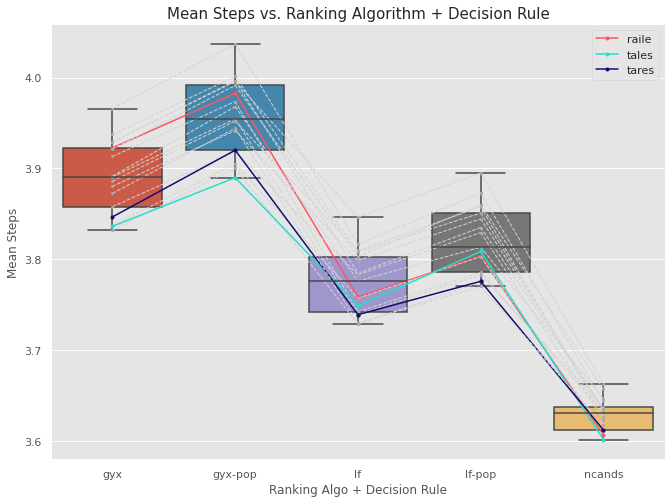

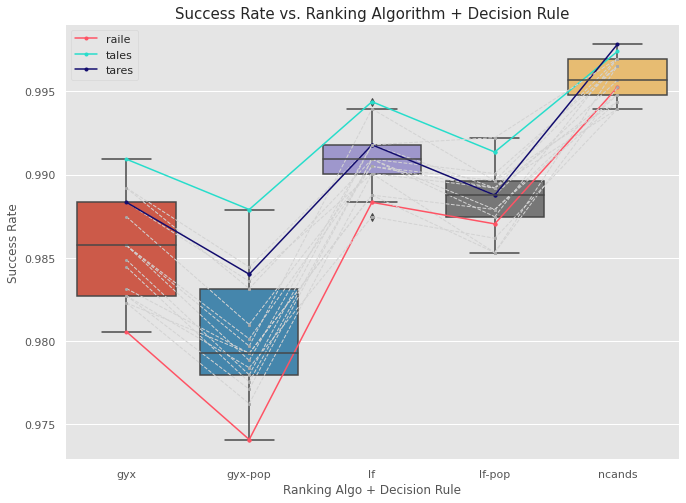

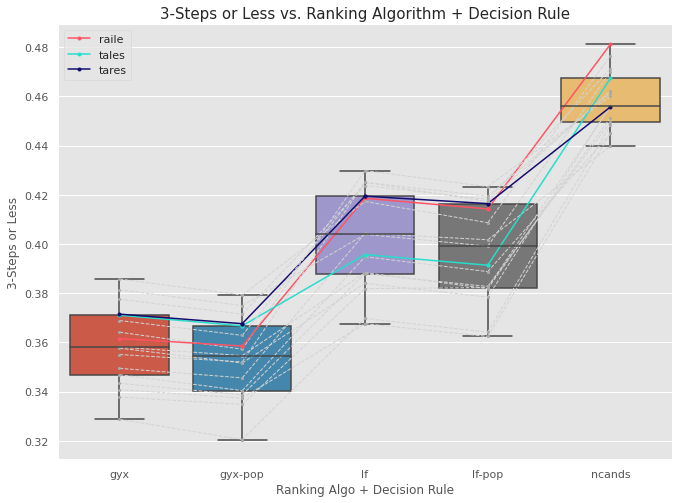

In [49]:
df_sorted = df.sort_values('Ranking Algorithm', key=lambda x: x.replace({
    'gyx': 0, 'gyx-pop': 1, 'lf': 2, 'lf-pop': 3, 'ncands': 4
}))

for metric in metrics:
    
    plt.figure(figsize=(11, 8))
    sns.boxplot(y=metric, x='Ranking Algorithm', data=df_sorted)
    plt.title(f'{metric} vs. Ranking Algorithm + Decision Rule', fontdict=fontdict)
    plt.xlabel('Ranking Algo + Decision Rule')
    ax = plt.gca()

    for word in df['Seed Word'].unique():
        if word in ['tales', 'tares', 'raile']:
            lw = 1.5
            ls = 'solid'
            ms = 3
        else:
            lw = 1
            ls = 'dashed'
            ms = 2
        if word == 'tales':
            color = '#27ddcb'
            mc = '#27ddcb'
            label = word
        elif word == 'tares':
            color = '#120c6e'
            mc = '#120c6e'
            label = word
        elif word == 'raile':
            color = '#ff5364'
            mc = '#ff5364'
            label = word
        else:
            color = 'lightgrey'
            mc = 'darkgrey'
            label = None
        linedata = df_sorted.loc[df_sorted['Seed Word'].eq(word)].reset_index(drop=True)
        for i, row in linedata.iterrows():
            if i == linedata.shape[0]-1:
                break
            ax.plot([i, i+1], [row[metric], linedata[metric].iloc[i+1]],
                    linewidth=lw, linestyle=ls, color=color, marker='o',
                    markersize=ms, markerfacecolor=mc, markeredgecolor=mc, label=label)
            label = None
    plt.legend()
    plt.show()

## Diagnosis

In [9]:
adf = all_data.drop('Unnamed: 0', axis=1)
adf['words'] = adf.words.apply(eval)
adf['word'] = adf.words.apply(lambda x: x[0])
adf['solution'] = adf.words.apply(lambda x: x[-1])
adf = adf.sort_values(['solution', 'word']).reset_index(drop=True)

In [10]:
solution_scores = adf.groupby('solution').agg({
    'steps': [
        ('Mean Steps', 'mean'),
        ('Success Rate', lambda x: np.mean(x < 7)),
        ('3-Steps or Less', lambda x: np.mean(x <= 3))
    ]
})

In [11]:
solution_scores.columns = ['Mean Steps', 'Success Rate', '3-Steps or Less']

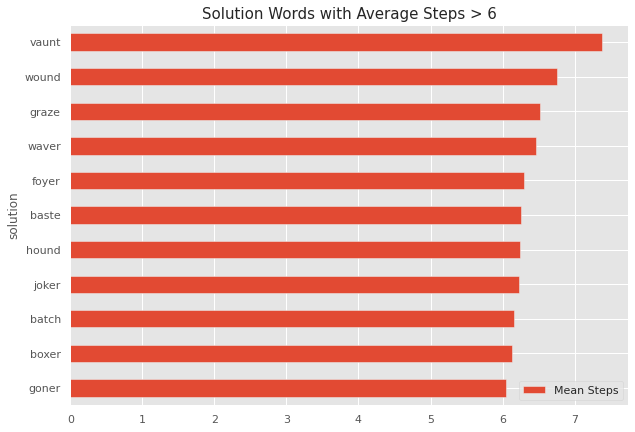

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.376471,0.129412,0.000000
wound,6.752941,0.200000,0.082353
graze,6.517647,0.494118,0.000000
waver,6.458824,0.552941,0.000000
foyer,6.294118,0.541176,0.011765
baste,6.258824,0.294118,0.200000
hound,6.247059,0.435294,0.117647
joker,6.223529,0.541176,0.011765
batch,6.164706,0.447059,0.152941


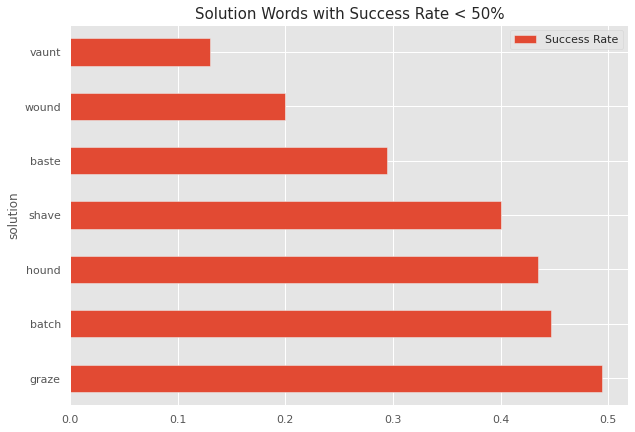

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.376471,0.129412,0.000000
wound,6.752941,0.200000,0.082353
baste,6.258824,0.294118,0.200000
shave,5.988235,0.400000,0.188235
hound,6.247059,0.435294,0.117647
batch,6.164706,0.447059,0.152941
graze,6.517647,0.494118,0.000000


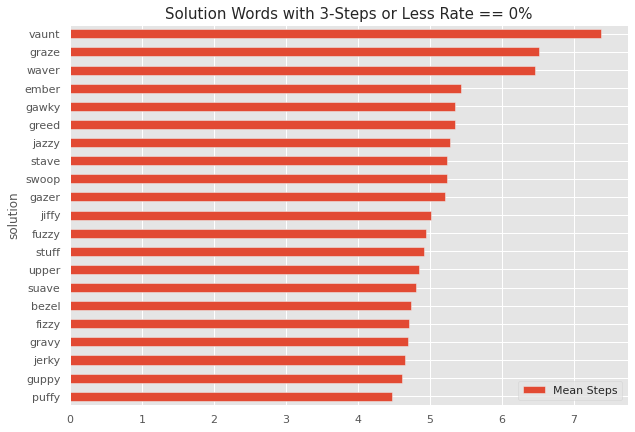

,Mean Steps,Success Rate,3-Steps or Less
solution,,,
vaunt,7.376471,0.129412,0.0
graze,6.517647,0.494118,0.0
waver,6.458824,0.552941,0.0
ember,5.423529,0.870588,0.0
gawky,5.352941,0.717647,0.0
greed,5.341176,0.964706,0.0
jazzy,5.282353,0.882353,0.0
stave,5.235294,0.976471,0.0
swoop,5.235294,0.952941,0.0


In [12]:
df_low_avg_steps = solution_scores.loc[solution_scores['Mean Steps'].gt(6)].sort_values('Mean Steps', ascending=False)
df_low_avg_steps[['Mean Steps']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with Average Steps > 6', fontdict=fontdict)
plt.show()
display(df_low_avg_steps)


df_low_success = solution_scores.loc[solution_scores['Success Rate'].lt(0.5)].sort_values('Success Rate', ascending=True)
df_low_success[['Success Rate']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with Success Rate < 50%', fontdict=fontdict)
plt.show()
display(df_low_success)

df_zero_3step = solution_scores.loc[solution_scores['3-Steps or Less'].eq(0)].sort_values('Mean Steps', ascending=False)
df_zero_3step[['Mean Steps']].plot.barh(figsize=(10,7))
plt.gca().invert_yaxis()
plt.title('Solution Words with 3-Steps or Less Rate == 0%', fontdict=fontdict)
plt.show()
display(df_zero_3step)

In [13]:
adf.loc[adf.word.eq('tales')].to_dict('records')[:3]

[{'steps': 5,
  'words': ['tales', 'noria', 'whack', 'quack', 'aback'],
  'feedback': "['XYXXX', 'XXXXY', 'XXGGG', 'XXGGG', 'GGGGG']",
  'ncands': '[102, 5, 2, 1, 1]',
  'algo': 'lf',
  'word': 'tales',
  'solution': 'aback'},
 {'steps': 4,
  'words': ['tales', 'array', 'again', 'aback'],
  'feedback': "['XYXXX', 'GXXYX', 'GXGXX', 'GGGGG']",
  'ncands': '[102, 12, 1, 1]',
  'algo': 'gyx',
  'word': 'tales',
  'solution': 'aback'},
 {'steps': 5,
  'words': ['tales', 'noria', 'champ', 'quack', 'aback'],
  'feedback': "['XYXXX', 'XXXXY', 'YXGXX', 'XXGGG', 'GGGGG']",
  'ncands': '[102, 5, 2, 1, 1]',
  'algo': 'lf-pop',
  'word': 'tales',
  'solution': 'aback'}]

In [14]:
from scipy import stats

In [15]:
algos = ['lf', 'gyx', 'lf-pop', 'gyx-pop', 'ncands']
for i, algo in enumerate(algos):
    for j in range(i+1, 5):
        print(f'[ ---- {algo.upper()} vs. {algos[j].upper()} ---- ]')
        test_result = stats.wilcoxon(adf.loc[adf.algo.eq(algo), 'steps'],
                                     adf.loc[adf.algo.eq(algos[j]), 'steps'])
        print(test_result.pvalue)
        print()

[ ---- LF vs. GYX ---- ]
1.797283437170917e-127

[ ---- LF vs. LF-POP ---- ]
1.8992026938186578e-26

[ ---- LF vs. GYX-POP ---- ]
3.336632268244551e-217

[ ---- LF vs. NCANDS ---- ]
1.6033209797760188e-197

[ ---- GYX vs. LF-POP ---- ]
9.867826038312608e-37

[ ---- GYX vs. GYX-POP ---- ]
1.431618768138163e-48

[ ---- GYX vs. NCANDS ---- ]
0.0

[ ---- LF-POP vs. GYX-POP ---- ]
5.053665492496757e-190

[ ---- LF-POP vs. NCANDS ---- ]
8.105101047269212e-304

[ ---- GYX-POP vs. NCANDS ---- ]
0.0



## Head-to-Head

In [16]:
h2h = pd.DataFrame()
h2h['solution'] = adf.loc[adf.algo.eq('lf'), 'solution'].values
h2h['lf'] = adf.loc[adf.algo.eq('lf'), 'steps'].values
h2h['gyx'] = adf.loc[adf.algo.eq('gyx'), 'steps'].values
h2h['lf-pop'] = adf.loc[adf.algo.eq('lf-pop'), 'steps'].values
h2h['gyx-pop'] = adf.loc[adf.algo.eq('gyx-pop'), 'steps'].values
h2h['ncands'] = adf.loc[adf.algo.eq('ncands'), 'steps'].values

In [17]:
algos = ['lf', 'gyx', 'lf-pop', 'gyx-pop', 'ncands']
for i, algo in enumerate(algos):
    for j in range(i+1, 5):
        print('----------------------------------')
        print(f'[ ---- {algo.upper()} vs. {algos[j].upper()} ---- ]')
        print(f'{algo.upper()} win: {100*np.mean(h2h[algo] < h2h[algos[j]]):.2f}%')
        print(f'{algos[j].upper()} win: {100*np.mean(h2h[algo] > h2h[algos[j]]):.2f}%')
        print(f'Draw: {100*np.mean(h2h[algo] == h2h[algos[j]]):.2f}%')
        # print('\n')

----------------------------------
[ ---- LF vs. GYX ---- ]
LF win: 33.28%
GYX win: 22.40%
Draw: 44.33%
----------------------------------
[ ---- LF vs. LF-POP ---- ]
LF win: 22.79%
LF-POP win: 19.55%
Draw: 57.66%
----------------------------------
[ ---- LF vs. GYX-POP ---- ]
LF win: 36.50%
GYX-POP win: 24.43%
Draw: 39.06%
----------------------------------
[ ---- LF vs. NCANDS ---- ]
LF win: 21.83%
NCANDS win: 31.39%
Draw: 46.78%
----------------------------------
[ ---- GYX vs. LF-POP ---- ]
GYX win: 27.06%
LF-POP win: 33.32%
Draw: 39.62%
----------------------------------
[ ---- GYX vs. GYX-POP ---- ]
GYX win: 23.68%
GYX-POP win: 20.04%
Draw: 56.29%
----------------------------------
[ ---- GYX vs. NCANDS ---- ]
GYX win: 20.91%
NCANDS win: 38.36%
Draw: 40.72%
----------------------------------
[ ---- LF-POP vs. GYX-POP ---- ]
LF-POP win: 28.57%
GYX-POP win: 18.14%
Draw: 53.29%
----------------------------------
[ ---- LF-POP vs. NCANDS ---- ]
LF-POP win: 21.94%
NCANDS win: 33.92%
D